# **<center>Muscle Recycler Graduation Project</center>**




-

#### **Import Required Libraries:**
Start by importing all required libraries.

# Import Required Libraries

In [1]:
import os
import cv2
import math
#import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import json
import os
import numpy as np
import subprocess
import math
from statistics import mean, stdev
from numpy import nan
from pathlib import Path
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import vlc
import time

# Choose Avatar OR Real video

# Avatar

In [4]:
def vlc_play(path_vid):
    media_player = vlc.MediaPlayer()
 
# media object
    media = vlc.Media(path_vid)
 
# setting media to the media player
    media_player.set_media(media)
 # start playing video
    media_player.play()
 
# wait so the video can be played for 5 seconds
# irrespective for length of video
    time.sleep(5)
 
# getting media
    value = media_player.get_media()
 
# printing media
    print("Media : ")
    print(value)
    

In [7]:
# creating vlc media player object
choice= "Heel_Slides_Exercise"
input=["Heel_Slides_Exercise", "Bird_Dog","Forwards_Backwards","Seated_Bicep"]
if choice==input[0]:
    vlc_play("C:/Users/ahmed/Desktop/Avatar/1- Heel Slides Exercise.mp4")
    
if choice==input[1] :
    vlc_play("C:/Users/ahmed/Desktop/Avatar/2- Seated Bicep Curls Exercise.mp4")   

if choice==input[2]:
    vlc_play("C:/Users/ahmed/Desktop/Avatar/3- Bird Dog Crunch Exercise.mp4")   
             
if choice==input[3]:
    vlc_play("C:/Users/ahmed/Desktop/Avatar/4- Forwards or Backwards Lunges Exercise.mp4")                


Media : 


**Set Numpy, Python & Tensorflow seeds to get consistent results.**

In [2]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

##  Import and Extract the Dataset



In [123]:
dataset_directory='C:/Users/ahmed/Desktop/Dataset'
#dataset_directory='C:/Users/ahmed/Desktop/New_Dataset'

##  Visualize the Dataset

In [289]:
plt.figure(figsize = (30, 30))

# Get Names of all classes in UCF50
all_classes_names = os.listdir(dataset_directory)

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)),4)
#random_range = random.choices(range(len(all_classes_names)),4)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    #x=dataset_directory+'{selected_class_Name}'
    video_files_names_list = os.listdir(f'{dataset_directory}/{selected_class_Name}')
print(video_files_names_list)

['v1.1.mp4', 'v1.2.mp4', 'v10.1.mp4', 'v10.2.mp4', 'v11.1.mp4', 'v11.2.mp4', 'v11.3.mp4', 'v11.5.mp4', 'v12.1.mp4', 'v12.2.mp4', 'v12.6.mp4', 'v2.1.mp4', 'v2.2.mp4', 'v3.1.mp4', 'v3.2.mp4', 'v3.3.mp4', 'v3.4.mp4', 'v3.5.mp4', 'v4.1.mp4', 'v4.2.mp4', 'v4.3.mp4', 'v4.4.mp4', 'v5.1.mp4', 'v5.2.mp4', 'v6.1.mp4', 'v6.2.mp4', 'v6.3.mp4', 'v7.1.mp4', 'v7.2.mp4', 'v8.1.mp4', 'v9.1.mp4', 'v9.10.mp4', 'v9.11.mp4', 'v9.12.mp4', 'v9.2.mp4', 'v9.3.mp4', 'v9.4.mp4', 'v9.5.mp4', 'v9.6.mp4', 'v9.7.mp4', 'v9.8.mp4']


<Figure size 2160x2160 with 0 Axes>

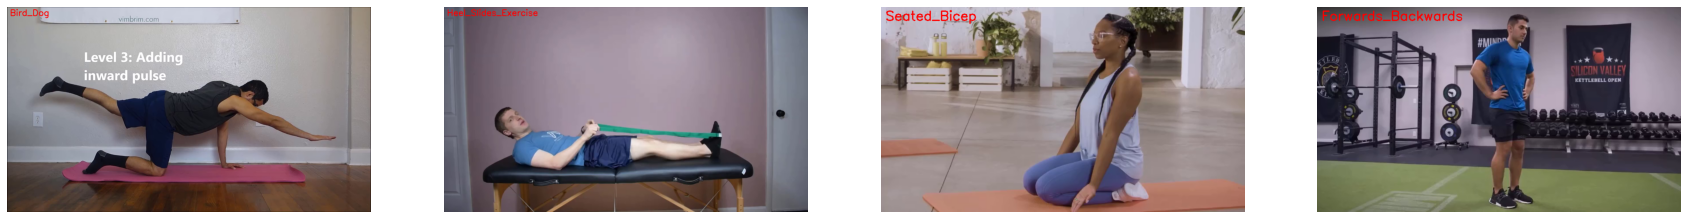

In [125]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))

# Get Names of all classes in UCF50
all_classes_names = os.listdir(dataset_directory)

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)),4)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    
    video_files_names_list = os.listdir(f'{dataset_directory}/{selected_class_Name}')

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)

    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'{dataset_directory}/{selected_class_Name}/{selected_video_file_name}')
    
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()

    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

##  Read & Preprocess the Dataset


In [126]:
image_height, image_width = 64, 64
max_images_per_class = 4000

#dataset_directory = 'C:/Users/ahmed/Desktop/Dataset'
classes_list = ["Heel_Slides_Exercise", "Bird_Dog","Forwards_Backwards","Seated_Bicep"]
#classes_list = ["Swing", "PushUps","PullUps","Lunges"]

model_output_size = len(classes_list)

In [127]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
    
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)

    # Iterating through Video Frames
    while True:

        # Reading a frame from the video file 
        success, frame= video_reader.read() 

        # If Video frame was not successfully read then break the loop
        if not success:
            break
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.GaussianBlur(frame,(5,5),0)
        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
       
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # returning the frames list 
    return frames_list

In [128]:
def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))

        # Iterating through all the files present in the files list
        for file_name in files_list:

            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)

            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path)

            # Appending the frames to a temporary list.
            temp_features.extend(frames)
        
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))

        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
        
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()

    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

In [129]:
#return all features using create_dataset() method
features, labels = create_dataset()

Extracting Data of Class: Heel_Slides_Exercise
Extracting Data of Class: Bird_Dog
Extracting Data of Class: Forwards_Backwards
Extracting Data of Class: Seated_Bicep


In [130]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [221]:
#Split the Data into Train and Test Set
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)

##  Construct the  CNN Model


In [222]:
def create_model():

    # We will use a Sequential model for model construction
    model = Sequential()

    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    #model.add(Dropout(0.5))
    model.add(GlobalAveragePooling2D())
    #model.add(Dropout(0.25))
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(model_output_size, activation = 'softmax'))

    # Printing the models summary
    model.summary()

    return model


# Calling the create_model method
model = create_model()

print("Model Created Successfully!")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization_8 (Batc  (None, 60, 60, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_4   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                      

##  Train the Model





In [223]:
# Adding the Early Stopping Callback to the model which will continuously monitor the validation loss metric for every epoch.
# If the models validation loss does not decrease after 15 consecutive epochs, the training will be stopped and the weight which reported the lowest validation loss will be retored in the model.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start Training
#train_X
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 15, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])
#model_training_history = model.fit(x = X_train, y = y_train, epochs = 15, batch_size = 4 , shuffle = False, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/15
2400/2400 [==============================] - 242s 100ms/step - loss: 0.8164 - accuracy: 0.6831 - val_loss: 0.4360 - val_accuracy: 0.8167
Epoch 2/15
2400/2400 [==============================] - 212s 88ms/step - loss: 0.2945 - accuracy: 0.8956 - val_loss: 0.0579 - val_accuracy: 0.9808
Epoch 3/15
2400/2400 [==============================] - 194s 81ms/step - loss: 0.1894 - accuracy: 0.9354 - val_loss: 0.0377 - val_accuracy: 0.9904
Epoch 4/15
2400/2400 [==============================] - 204s 85ms/step - loss: 0.1507 - accuracy: 0.9499 - val_loss: 0.0074 - val_accuracy: 0.9992
Epoch 5/15
2400/2400 [==============================] - 198s 82ms/step - loss: 0.1315 - accuracy: 0.9575 - val_loss: 0.1242 - val_accuracy: 0.9758
Epoch 6/15
2400/2400 [==============================] - 224s 93ms/step - loss: 0.1239 - accuracy: 0.9619 - val_loss: 0.0153 - val_accuracy: 0.9987
Epoch 7/15
2400/2400 [==============================] - 228s 95ms/step - loss: 0.0942 - accuracy: 0.9710 - val_loss: 

### **Evaluating Your Trained Model**


In [224]:
model_evaluation_history = model.evaluate(features_test, labels_test)

125/125 [==============================] - 16s 128ms/step - loss: 6.2400e-04 - accuracy: 1.0000


### Save Your Model


In [198]:
# Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'Model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Saving your Model
model.save(model_name)

In [205]:
from tensorflow import keras
model_training_history = keras.models.load_model('C:/Users/ahmed/Downloads/Model___Date_Time_2022_06_13__07_10_55___Loss_0.001044785720296204___Accuracy_0.999750018119812.h5')

##  Plot Model’s Loss & Accuracy Curves


In [236]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
    epochs = range(len(metric_value_1))
  
  # Plotting the Graph
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
    plt.title(str(plot_name))

  # Adding legend to the plot
    plt.legend()   

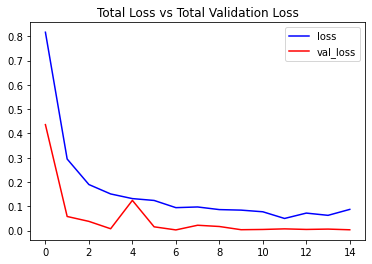

In [238]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

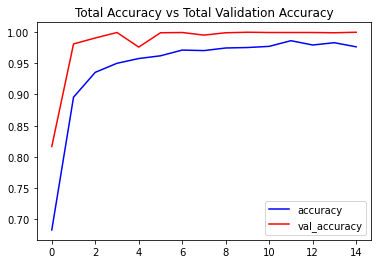

In [227]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

# Confusion Matrix

In [290]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import pandas as pd

#x_testpred=model.predict(features_train)
#y_pred=np.argmax(y_pred, axis=1)
#train_acc=accuracy_score(labels_train , x_testpred)
#print(x_testpred)

In [254]:
def conMatrix(Matrix):
    metrics = pd.DataFrame(index =['Sensitivity', 'Specificity','Error','accuracy','presicion','F1_Messure'],
                       columns =  ["Heel_Slides_Exercise", "Bird_Dog","Forwards_Backwards","Seated_Bicep"])
    Map = 0
    for i in range (0,len(cm)):
        TP = Matrix[i][i]
        FN = sum(Matrix[i])-TP #row 
        FP = sum(Matrix[:,i])-TP #col
        TN = sum(sum(Matrix))-TP-FN-FP

        accuracy = (TP+TN)/(TP+TN+FP+FN)
        error = 1-TP/sum(Matrix[i])
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        presicion=TP/(TP+FP)
        F1_Messure=(2*presicion*sensitivity)/(sensitivity+presicion)
        
        

        metrics.iloc[0][i] = round(sensitivity,6)
        metrics.iloc[1][i] = round(specificity,6)
        metrics.iloc[2][i] = round(error,6)
        metrics.iloc[3][i] = round(accuracy,6)
        metrics.iloc[4][i] = round(presicion,6)
        metrics.iloc[5][i] = round(F1_Messure,6)
        
        Map += metrics.iloc[3][i] 
    print(metrics)
    print(Map/4)


In [264]:
y_pred=model.predict(features_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(labels_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

125/125 [==============================] - 17s 140ms/step
[[1053    0    0    0]
 [   0  941    0    0]
 [   0    0 1009    0]
 [   0    0    0  997]]


[[1053    0    0    0]
 [   0  941    0    0]
 [   0    0 1009    0]
 [   0    0    0  997]]


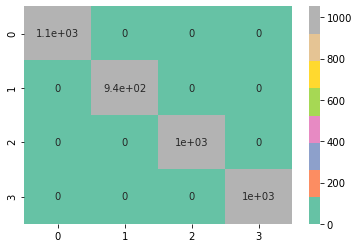

In [253]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(labels_test, features_test)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [252]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [265]:
conMatrix(cm)

            Heel_Slides_Exercise Bird_Dog Forwards_Backwards Seated_Bicep
Sensitivity                    1        1                  1            1
Specificity                    1        1                  1            1
Error                          0        0                  0            0
accuracy                       1        1                  1            1
presicion                      1        1                  1            1
F1_Messure                     1        1                  1            1
1.0


##  Make Predictions with the Model

#### **Function To Predict on Live Videos Using Moving Average:**
This function will predict on live videos using moving_average,  If you set `window_size` hyperparameter to `1` then this function will behave like a normal classifier to predict on video frames.


In [256]:
def predict_on_live_video(video_file_path, output_file_path, window_size):

    # Initialize a Deque Object with a fixed size which will be used to implement moving/rolling average functionality.
    predicted_labels_probabilities_deque = deque(maxlen = window_size)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting the width and height of the video 
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Writing the Overlayed Video Files Using the VideoWriter Object
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))

    while True: 

        # Reading The Frame
        status, frame = video_reader.read() 

        if not status:
            break

        # Resize the Frame to fixed Dimensions
        frame = cv2.GaussianBlur(frame,(5,5),0)
        resized_frame = cv2.resize(frame, (64, 64))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)

        # Assuring that the Deque is completely filled before starting the averaging process
        if len(predicted_labels_probabilities_deque) == window_size:

            # Converting Predicted Labels Probabilities Deque into Numpy array
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)

            # Calculating Average of Predicted Labels Probabilities Column Wise 
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

            # Converting the predicted probabilities into labels by returning the index of the maximum value.
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)

            # Accessing The Class Name using predicted label.
            predicted_class_name = classes_list[predicted_label]
          
            # Overlaying Class Name Text Ontop of the Frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Writing The Frame
        video_writer.write(frame)


        # cv2.imshow('Predicted Frames', frame)

        # key_pressed = cv2.waitKey(10)

        # if key_pressed == ord('q'):
        #     break

    # cv2.destroyAllWindows()

    
    # Closing the VideoCapture and VideoWriter objects and releasing all resources held by them. 
    video_reader.release()
    video_writer.release()

In [292]:
# Creating The Output directories if it does not exist
output_directory = 'C:/Users/ahmed/Desktop'
os.makedirs(output_directory, exist_ok = True)

# Getting the YouTube Video's path you just downloaded
input_video_file_path = f'C:/Users/ahmed/Desktop/Heel1.mp4'

#### **Results Without Using Moving Average:**
First let's see the results when we're not using moving average, we can do this by setting the `window_size` to `1`.

In [258]:
# Setting sthe Widow Size which will be used by the Rolling Averge Proces
window_size = 1

# Construting The Output YouTube Video Path
output_video_file_path = f'C:/Users/ahmed/Desktop/result1.mp4'

# Calling the predict_on_live_video method to start the Prediction.
predict_on_live_video(input_video_file_path, output_video_file_path, window_size)

# Play Video File in the Notebook
VideoFileClip(output_video_file_path).ipython_display(width = 700)
#print(output_video_file_path)

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 29ms/step


t:   1%|▌                                                                    | 3/392 [00:00<00:14, 26.04it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


#### **Results When Using Moving Average:**
Now let's use moving average with a window size of `25`.

In [293]:
# Setting the Widow Size which will be used by the Rolling Averge Process
window_size = 25

# Construting The OutputVideo Path
output_video_file_path = f'C:/Users/ahmed/Desktop/temp1 -Output-WSize {window_size}.mp4'
# Calling the predict_on_live_video method to start the Prediction and Rolling Averge Process
predict_on_live_video(input_video_file_path, output_video_file_path, window_size)

# Play Video File in the Notebook
VideoFileClip(output_video_file_path).ipython_display(width = 700)

1/1 [==============================] - 0s 30ms/step


t:   0%|                                                                             | 0/229 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Although the results, are not perfect but you can clearly see that it's much better than the previous approach of predicting on each frame independently.

## **Step 9: Using Single-Frame CNN Method:**
Now let's create a function that will output a singular prediction for the complete video, now this function will take `n` frames from the entire video and make predictions. In the end, it will average the predictions of those <code>n</code> frames to give you the final activity class for that video. You can set the value of <code>n</code> using the <code>predictions_frames_count</code> variable.

This function is useful when you have a video containing one activity and you want to know the activity's name and its score.


In [45]:
def make_average_predictions(video_file_path, predictions_frames_count):
    
    # Initializing the Numpy array which will store Prediction Probabilities
    predicted_labels_probabilities_np = np.zeros((predictions_frames_count, model_output_size), dtype = np.float)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting The Total Frames present in the video 
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculating The Number of Frames to skip Before reading a frame
    skip_frames_window = video_frames_count // predictions_frames_count

    for frame_counter in range(predictions_frames_count): 

        # Setting Frame Position
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading The Frame
        _ , frame = video_reader.read() 

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_np[frame_counter] = predicted_labels_probabilities

    # Calculating Average of Predicted Labels Probabilities Column Wise 
    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]
    
    #max_value =max(predicted_labels_probabilities_averaged)
    #idx = np.where(predicted_labels_probabilities_averaged == max_value)
    #print(idx[0])
    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:

        # Accessing The Class Name using predicted label.
        predicted_class_name = classes_list[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")
        #print ("Max value element : ", max(predicted_probability))
        #print(predicted_probability)
    
    # Closing the VideoCapture Object and releasing all resources held by it. 
    video_reader.release()

In [294]:
# Construting The Input YouTube Video Path
input_video_file_path = f'C:/Users/ahmed/Desktop/Heel1.mp4'

# Calling The Make Average Method To Start The Process
make_average_predictions(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)

1/1 [==============================] - 0s 30ms/step
CLASS NAME: Heel_Slides_Exercise   AVERAGED PROBABILITY: 1e+02
CLASS NAME: Forwards_Backwards   AVERAGED PROBABILITY: 0.00028
CLASS NAME: Bird_Dog   AVERAGED PROBABILITY: 3.7e-07
CLASS NAME: Seated_Bicep   AVERAGED PROBABILITY: 2.1e-08


t:   1%|▉                                                                    | 3/229 [00:00<00:07, 29.16it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
# Construting The Input Video Path
input_video_file_path = f'/content/Youtube_Videos/Bird Dog Crunch.mp4'

# Calling The Make Average Method To Start The Process
make_average_predictions(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)

# Open Pose & Angel Measurement

In [259]:
import json
import os
import numpy as np
import subprocess
import math

In [6]:
# function take folder_name.
# create folder and return path.
def create_folder_for_user(folder_name):
    user_path = os.path.expanduser('~')
    user_dir = user_path + "\\" + folder_name
    os.mkdir(user_dir)
    return user_dir

In [7]:
# create folder for openpose output.
folder_name2 = "openpose"
path2 = create_folder_for_user(folder_name2)

In [10]:
#For One Video
##F:\openpose-1.6.0-binaries-win64-gpu-flir-3d_recommended\openpose
openpose_path = "C:/Users/ahmed/Desktop/Openpose/openpose"
#H:\videos\Project2.avi
video_path = "C:/Users/ahmed/Desktop/Newfolder/result3.mp4"
json_output = path2
os.chdir(openpose_path)
command = "".join(["bin\\OpenPoseDemo.exe", " -video ", video_path , " -write_json ", json_output])#--frame_step 10
#command = "".join(["bin\\OpenPoseDemo.exe", " -video ", video_path ])
subprocess.run(command, shell=True)

CompletedProcess(args='bin\\OpenPoseDemo.exe -video C:/Users/ahmed/Desktop/Newfolder/result3.mp4 -write_json C:\\Users\\ahmed\\openpose', returncode=0)

In [11]:
def Frame(JsonName):
    jsons_dir = json_output
    pose = json.load(open(os.path.join(jsons_dir, JsonName)))
    numpy_2d_arrays = np.array(pose['people'][0]['pose_keypoints_2d'])
    #print("Original Array")
    #print(numpy_2d_arrays) ################ Important ###############
    # skipping third element
    numpy_2d_arrays = np.insert(numpy_2d_arrays, 0, 0, axis=0)
    # reshape into [ x y ] -- mod >> 2.10500e+02 >>> 210 -- arrange >> stop at when reach the size
    new_arr = numpy_2d_arrays[np.mod(np.arange(numpy_2d_arrays.size), 3) != 0].reshape(-1, 2)
    #print("Array after skipping 3rd : ")
    #print(new_arr) ################ Important ###############

    # calculate the angel between 3 points based on dotporduct https://muthu.co/using-the-law-of-cosines-and-vector-dot-product-formula-to-find-the-angle-between-three-points/
    def angle_between_three_points(pointA, pointB, pointC):
        BA = pointA - pointB
        BC = pointC - pointB
        try:
            cosine_angle = np.dot(BA, BC) / (np.linalg.norm(BA) * np.linalg.norm(BC))

            angle = np.arccos(cosine_angle)
        except:
            print("exc")
            raise Exception('invalid cosine')

        return np.degrees(angle)

    # saving everyjoint of body
    angel0 = 0
    angel1 = angle_between_three_points(new_arr[0], new_arr[1], new_arr[2])
    angel2 = angle_between_three_points(new_arr[0], new_arr[1], new_arr[5])
    angel3 = angle_between_three_points(new_arr[5], new_arr[1], new_arr[8])
    angel4 = angle_between_three_points(new_arr[2], new_arr[1], new_arr[8])
    angel5 = angle_between_three_points(new_arr[1], new_arr[5], new_arr[6])
    angel6 = angle_between_three_points(new_arr[1], new_arr[2], new_arr[3])
    angel7 = angle_between_three_points(new_arr[5], new_arr[6], new_arr[7])
    angel8 = angle_between_three_points(new_arr[2], new_arr[3], new_arr[4])
    angel9 = angle_between_three_points(new_arr[1], new_arr[8], new_arr[9])
    angel10 = angle_between_three_points(new_arr[1], new_arr[8], new_arr[12])
    angel11 = angle_between_three_points(new_arr[8], new_arr[12], new_arr[13])
    angel12 = angle_between_three_points(new_arr[8], new_arr[9], new_arr[10])
    angel13 = angle_between_three_points(new_arr[12], new_arr[13], new_arr[14])
    angel14 = angle_between_three_points(new_arr[9], new_arr[10], new_arr[11])
    angel15 = angle_between_three_points(new_arr[10], new_arr[11], new_arr[22])
    angel16 = angle_between_three_points(new_arr[13], new_arr[14], new_arr[19])
    angelList = [angel0, angel1, angel2, angel3, angel4, angel5, angel6, angel7, angel8, angel9, angel10, angel11, angel12,
                 angel13, angel14, angel15, angel16]
    # print with float
    #print(angelList) ################ Important ###############
    # print with 2 decimal places
    floatangelList = list(map(lambda x: round(x, ndigits=2), angelList))
    # print all angles  ################ Important ###############
    # print(floatangelList)

    # return specific angle

    return [floatangelList[0], floatangelList[1], floatangelList[2], floatangelList[3], floatangelList[4], floatangelList[5], floatangelList[6], floatangelList[7], floatangelList[8], floatangelList[9], floatangelList[10], floatangelList[11], floatangelList[12], floatangelList[13], floatangelList[14], floatangelList[15], floatangelList[16]]
# iterate over Json files
firstAngles=[] # store one angle of all frames
def LoopAndIndex(K): #K = The Angel Number
        testLst=[]
        for filename in os.listdir(json_output):
            f = os.path.join(json_output, filename)
            testLst.append(Frame(f)[K])
            # checking if it is a file
            #if os.path.isfile(f):
                #print(f)

        firstAngles.append(testLst)


        return firstAngles

##removed abs()
##first two elements are exception because there's no previous by 2
def preprocFN(*U):
    prePlst=[] # after preprocessing list
    #preprocessing Fc =| 2*LF1 prev by 1 - LF2 prev by 2 |
    c0 = -2     #(previous) by 2
    c1 =-1      #(previous)
    c2 =0       #(current)
    c3 = 1      #(next)
    preP = U[0] # original list
    if c2 == 0:
        prePlst.append(preP[0])
        prePlst.append(preP[1])
        c1+=2
        c2+=2
        c0+=2
    oldlen = len(preP)
    while oldlen > c2:
        Equ = abs(2*preP[c1] - preP[c0]) #fn of preprocessing #removed abs()
        formatted_float = "{:.2f}".format(Equ) #with .2 number only
        equu = float(formatted_float)          #from string float to float
        prePlst.insert(c2,equu)      # insert the preprocessed value to the List
        c1+=1
        c2+=1
        c0+=1

    return prePlst

#Equ = (preP[c1] + preP[c3])/2 #fn of preprocessing
#first and last elements are excepetion because there's no previous , next in original list
def outLiersFN(*U):
    outliers=[] # after preprocessing list
    #preprocessing Fc =| 2*LF1 prev by 1 - LF2 prev by 2 |
    c0 = -2     #(previous) by 2 #from original
    c1 =-1      #(previous)      #from original
    c2 =0       #(current)       #from original
    c3 = 1      #(next)          #from original
    preP = U[0] # original list
    if c2 == 0:
        outliers.append(preP[0])
        c1+=1
        c2+=1
        c0+=1
        c3+=1
    oldlen = len(preP)
    M_RangeOfMotion = 90
    while oldlen > c2 :
        if c3 == oldlen:
            outliers.insert(c2, preP[c2]) #preP[c2] >> last element in old list
            break
        if (preP[c2] > M_RangeOfMotion and preP[c2] < (preP[c1] + preP[c3])/2) or (preP[c2] < M_RangeOfMotion and preP[c2] > (preP[c1] + preP[c3])/2): #Check Paper 3.3.1
            Equ = (preP[c1] + preP[c3])/2 #fn of preprocessing # From third index # ==== inserting current frame
            formatted_float = "{:.2f}".format(Equ) #with .2 number only
            equu = float(formatted_float)          #from string float to float
            outliers.insert(c2,equu)      # insert the preprocessed value to the List
            c1+=1
            c2+=1
            c0+=1
            c3+=1
        else :
            Equ = preP[c2] # fn of preprocessing #put same element (do nothing)
            formatted_float = "{:.2f}".format(Equ)  # with .2 number only
            equu = float(formatted_float)  # from string float to float
            outliers.insert(c2, equu)  # insert the preprocessed value to the List
            c1 += 1
            c2 += 1
            c0 += 1
            c3 += 1
    return outliers

#Test
def get_number_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count
def remove_nan(list):
    newlist = [x for x in list if math.isnan(x) == False]
    return newlist
#guide to use
p = (LoopAndIndex(13)[0])
#p1 = (LoopAndIndex(14)[1])
#original angles with NAN values
#p0 = remove_nan(LoopAndIndex(13)[0]) #original angles without NAN values
#p1 = preprocFN(LoopAndIndex(13)[0]) #preprocessing without outliers
#p2 = outLiersFN(preprocFN(LoopAndIndex(13)[0])) #preprocessing with outliers
#print("Number of elements in the list: ", get_number_of_elements(LoopAndIndex(7)[0]))

#p0 = remove_nan(LoopAndIndex(14)[0])
#p1 = preprocFN(p)
#p2 = outLiersFN(p1)
#print(p0)
print(p)
#print(p1)
#print(p2)

#test
#p1 = preprocFN([4,5,20,7,10])
#p2 = outLiersFN(p1)
#print(preprocFN(LoopAndIndex(7)[0]))
#print(LoopAndIndex(8)[0])

# Get List of Angles after performing Angle Mesurments




[169.14, 167.85, 169.03, 166.95, 166.88, 166.91, 165.51, 165.48, 164.18, 163.98, 161.82, 159.04, 158.95, 158.9, 157.53, 156.86, 156.67, 155.32, 155.77, 155.08, 155.54, 154.17, 152.6, 150.5, 146.48, 146.31, 144.67, 145.25, 143.74, 143.47, 142.33, 140.65, 139.27, 135.07, 133.47, 133.16, 132.9, 131.01, 131.1, 130.74, 128.08, 123.42, 121.0, 121.37, 119.59, 118.35, 115.14, 111.66, 107.38, 105.05, 103.57, 103.06, 98.99, 95.21, 94.13, 92.05, 89.44, 87.4, 87.36, 85.26, 84.82, 83.9, 79.36, 78.95, 76.36, 70.65, 69.3, 66.73, 64.85, 62.66, 60.96, 56.9, 57.94, 57.27, 56.04, 53.36, 52.12, 52.15, 51.77, 51.76, 51.19, 51.19, 50.61, 50.85, 51.59, 51.31, 53.24, 55.53, 57.08, 57.53, 57.49, 61.78, 64.03, 64.1, 67.6, 70.89, 70.07, 72.23, 75.58, 76.78, 79.17, 85.4, 87.41, 86.94, 87.46, 88.98, 90.07, 94.68, 97.17, 100.03, 104.59, 103.6, 105.19, 106.84, 110.53, 113.54, 116.94, 119.12, 120.27, 120.62, 123.85, 127.83, 129.13, 129.73, 130.02, 130.34, 131.9, 132.22, 133.46, 136.8, 139.19, 141.02, 143.92, 143.74, 

NameError: name 'p1' is not defined

In [4]:
def delete_folder_for_user(direction):
    try:
        for dir in os.listdir(direction): 
            os.remove(direction + "\\" + dir)
        os.rmdir(direction)
        print("directory deleted")
    except OSError as e:
        print("Error: %s : %s" % (direction, e.strerror))

In [5]:
delete_folder_for_user(path2)

NameError: name 'path2' is not defined

# Counting Repetition & FeedBack

# Preprocessing


In [17]:
def median_filter(x):
    df = pd.DataFrame({'x': x})
    df1 = df.x.rolling(10, center=True).median()
    kkk = df1.values.tolist()
    return kkk
def smooth(t):
 new_t = []
 for i, x in enumerate(t):
     neighbourhood = t[max(i-2,0): i+3]
     m = mean(neighbourhood)
     s = stdev(neighbourhood, xbar=m)
     if abs(x - m) > s:
        x = ( t[i - 1 + (i==0)*2] + t[i + 1 - (i+1==len(t))*2] ) / 2
        new_t.append(x)
     return new_t

In [22]:
  ##______________________________ Preprocessing _____________________________________##
def remove_nan(list):
    newlist = [x for x in list if math.isnan(x) == False]
    return newlist
def outLiersFN(*U):
    outliers=[] # after preprocessing list
    #preprocessing Fc =| 2*LF1 prev by 1 - LF2 prev by 2 |
    c0 = -2     #(previous) by 2 #from original
    c1 =-1      #(previous)      #from original
    c2 =0       #(current)       #from original
    c3 = 1      #(next)          #from original
    preP = U[0] # original list
    if c2 == 0:
        outliers.append(preP[0])
        c1+=1
        c2+=1
        c0+=1
        c3+=1
    oldlen = len(preP)
    M_RangeOfMotion = 125
    while oldlen > c2 :
        if c3 == oldlen:
            outliers.insert(c2, preP[c2]) #preP[c2] >> last element in old list
            break
        if (preP[c2] > M_RangeOfMotion and preP[c2] > (preP[c1] + preP[c3])/2) or (preP[c2] < M_RangeOfMotion and preP[c2] < (preP[c1] + preP[c3])/2): #Check Paper 3.3.1
            Equ = (preP[c1] + preP[c3])/2 #fn of preprocessing # From third index # ==== inserting current frame
            formatted_float = "{:.2f}".format(Equ) #with .2 number only
            equu = float(formatted_float)          #from string float to float
            outliers.insert(c2,equu)      # insert the preprocessed value to the List
            c1+=1
            c2+=1
            c0+=1
            c3+=1
        else :
            Equ = preP[c2] # fn of preprocessing #put same element (do nothing)
            formatted_float = "{:.2f}".format(Equ)  # with .2 number only
            equu = float(formatted_float)  # from string float to float
            outliers.insert(c2, equu)  # insert the preprocessed value to the List
            c1 += 1
            c2 += 1
            c0 += 1
            c3 += 1
    return outliers
def preprocFN(*U):
    prePlst=[] # after preprocessing list
    #preprocessing Fc =| 2*LF1 prev by 1 - LF2 prev by 2 |
    c0 = -2     #(previous) by 2
    c1 =-1      #(previous)
    c2 =0       #(current)
    c3 = 1      #(next)
    preP = U[0] # original list
    if c2 == 0:
        prePlst.append(preP[0])
        prePlst.append(preP[1])
        c1+=2
        c2+=2
        c0+=2
    oldlen = len(preP)
    while oldlen > c2:
        Equ = abs(2*preP[c2] - preP[c3]) #fn of preprocessing #removed abs()
        formatted_float = "{:.2f}".format(Equ) #with .2 number only
        equu = float(formatted_float)          #from string float to float
        prePlst.insert(c2,equu)      # insert the preprocessed value to the List
        c1+=1
        c2+=1
        c0+=1

    return prePlst
def remove_gaps(list,lower_bound) :
     xs = list
     xs = [x for x in xs if x < lower_bound+10]
     return xs
def indexlist_list(list):
    y = []
    m = 0
    for i in list:
        y.append(m)
        m += 1
    return y
def smooth_data_lowess(arr, span):
    x = np.linspace(0, 1, len(arr))

    return sm.nonparametric.lowess(arr, x, frac=(5*span / len(arr)), return_sorted=False)
def first_10(list):
    y = []
    m = 0
    for i in list:
        y.append(i)
        m += 1
        if m == 10 :
            break
    return y
def last_10(list):
    y = []

    m = len(list) - 10
    while(m!=len(list)) :
        y.append(list[m])
        m+=1
    return y


def final_filter(x):
    df = pd.DataFrame({'x': x})
    df2 = df.x[df.x > 60] #droput
    kkk2 = df2.values.tolist() #convert to list
    y = kkk2
    df3 = pd.DataFrame({'y': y})
    df4 = df3.y.rolling(10, center=True).median() #median  after droput
    kkk4 = df4.values.tolist()
    return kkk4


[166.89499999999998, 166.195, 165.495, 164.82999999999998, 164.07999999999998, 162.89999999999998, 160.43, 158.995, 158.925, 158.215, 157.195, 156.765, 156.22, 155.655, 155.43, 155.2, 154.625, 153.385, 151.55, 148.49, 146.39499999999998, 145.78, 144.95999999999998, 144.20499999999998, 143.60500000000002, 142.9, 141.49, 139.96, 137.17000000000002, 134.26999999999998, 133.315, 133.03, 132.0, 131.055, 130.875, 129.41000000000003, 125.75, 122.39500000000001, 121.185, 120.295, 118.97, 116.745, 113.4, 109.52, 106.215, 104.31, 103.315, 101.025, 97.1, 94.66999999999999, 93.09, 90.745, 88.42, 87.38, 86.31, 85.03999999999999, 84.36, 81.63, 79.155, 77.655, 73.505, 69.975, 68.015, 65.78999999999999, 64.475, 64.475, 64.475, 64.475, 64.475, 65.85, 68.835, 70.47999999999999, 71.56, 73.905, 76.18, 77.975, 82.285, 86.17, 87.175, 87.435, 88.22, 89.525, 92.375, 95.92500000000001, 98.6, 101.815, 104.095, 104.89, 106.015, 108.685, 112.035, 115.24000000000001, 118.03, 119.695, 120.445, 122.235, 125.84, 128.

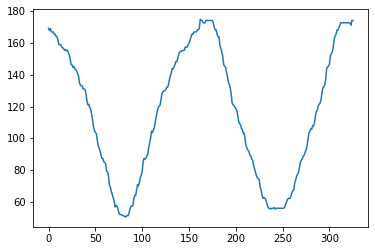

In [23]:
#####input from Angel Mess
x=p
plt.plot(x)
x = remove_nan(x)
y = remove_nan(final_filter(x)) ### final filter
print(y)
# plt.plot(y)
# plt.show()

left_add = max(first_10(x))     #biggest  last 10 items
right_add = max(last_10(x))   #biggest first 10 items
#y = smooth_data_lowess(x,10)
y=np.insert(y,0,left_add)
y = np.insert(y,len(y)-1,right_add)

# Counting Repetetion & Feedback

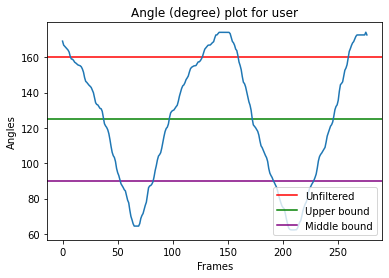

Great start keep it up
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the repetition
Keep Going to complete the 

In [24]:



####################################        Counting        ####################################

# Get exercise_name from Exersice Recognition
exercise_name = "Heel Slides Exercise"
#exercise_name = "Seated Bicep Curls Exercise"
#exercise_name = "Bird Dog Crunch Exercise"
#exercise_name = "Forwards Lunges Exercise"

if exercise_name == "Heel Slides Exercise":
  angle_joint = [13, 14]
  # 160 <= Upper <= 180, 20 <= lower <= 90
  Upper_bound = 160
  Middle_bound = 125
  lower_bound = 90

elif exercise_name == "Seated Bicep Curls Exercise":
  angle_joint = [7, 8]
  # 160 <= Upper <= 180, 0 <= lower <= 50
  Upper_bound = 160
  Middle_bound = 120
  lower_bound = 80

elif exercise_name == "Bird Dog Crunch Exercise":
  # angle_joint = [7, 14, 8, 13]
  angle_joint = [13, 14]
  # 150 <= Upper <= 180, 0 <= lower <= 90
  Upper_bound = 150
  Middle_bound = 120
  lower_bound = 90

elif exercise_name == "Forwards or Backwards Lunges Exercise":
  angle_joint = [13]
  # 160 <= Upper <= 180, 60 <= lower <= 100
  Upper_bound = 160
  Middle_bound = 130
  lower_bound = 100

angles = y
# Round angles list to .2f
angles_rounded = [round(num,2) for num in angles]

#setting upper bound line
plt.axhline(Upper_bound, color = 'r', linestyle = '-')

#setting middle bound line
plt.axhline(Middle_bound, color = 'g', linestyle = '-')

#setting lower bound line
plt.axhline(lower_bound, color = 'purple', linestyle = '-')

font1 = {'family':'times','color':'black','size':12}
font2 = {'family':'times','color':'black','size':10}

plt.title("Angle (degree) plot for user", fontdict = font1)
plt.xlabel("Frames", fontdict = font2)
plt.ylabel("Angles", fontdict = font2)

# Function add a legend  
plt.legend(["Unfiltered", "Upper bound", "Middle bound", "Lower bound"], loc ="lower right")

#plotting angels
plt.plot(angles_rounded)

# function to show the plot
plt.show()


end = len(angles_rounded)-2

# For Counting Repetitions
def counter(angles_rounded):
  count_r = 0
  j = 0
  for j in range(end):
      if angles_rounded[j] > Middle_bound and Middle_bound >= angles_rounded[j+1]:
        count_r += 1
        j += 1
  return count_r

Num_repetition = counter(angles_rounded)



i = 0
true = 0
flag_u1 = 0
flag_u2 = 0
flag_l = 0
flag_m = 0
last = -1
previous = -1
old = -1
passed = 0
count_incorrect = 0

# For Calculating Correct and Incorrect Repetitions
while i != end:

  # check first Upper_bound for each rep
  while angles_rounded[i] >= Upper_bound and i != end:
    i += 1
    if angles_rounded[i] < Upper_bound:
      flag_u1 = 1
      break
    else:
      continue

  # user starts rep from Upper_bound
  if flag_u1 == 1 and angles_rounded[i] < Upper_bound and angles_rounded[i-1] >= Upper_bound and i != last:
    print('Great start keep it up') # feed 1 Done
    last = i
  # user starts rep under Upper_bound
  elif flag_u1 == 0 and Upper_bound > angles_rounded[i] > Middle_bound and flag_u2 == flag_m == flag_l == 0:
    print('You had to start the repetition at an angle of ' + str(Upper_bound) + '° or more to be considered this as a correct repetition') # feed 2 Done

  # check first Middle_bound for each rep
  while angles_rounded[i] < Upper_bound and angles_rounded[i] >= Middle_bound and i != end:
    i += 1
    if flag_u1 == 1:
      # user starts rep above Upper_bound
      print('Keep Going to complete the repetition') # feed 3 Done
    if angles_rounded[i] < Middle_bound:
      flag_m = 1
      break
    else:
      continue

  # user starts rep under Middle_bound and above lower_bound
  if flag_u1 == 0 and flag_m == 1 and i != previous and Middle_bound >= angles_rounded[i] >= lower_bound:
    print('You had to start the repetition at an angle of ' + str(Upper_bound) + '° or more to be considered this as a correct repetition') # feed 4 Done 
    previous = i

  # check lower_bound for each rep
  while angles_rounded[i] < Middle_bound and angles_rounded[i] >= lower_bound and i != end:
    i += 1
    if flag_u1 == flag_m == 1:
      # user touch Upper, and Middle bounds
      print('Keep Going to complete the repetition') # feed 5 Done
    if angles_rounded[i] < lower_bound:
      flag_l = 1
      break
    else:
      continue

  # check rest of lower_bound for each rep
  while angles_rounded[i] < lower_bound and i != end:
    i += 1
    if flag_u1 == flag_m == flag_l == 1:
      # user touch Upper, Middle, and lower bounds
      print('Keep Going to complete the repetition') # feed 5 Done
    if angles_rounded[i] >= lower_bound:
      passed = 1
      break
    else:
      continue

  # check second Upper_bound for each rep
  while lower_bound <= angles_rounded[i] < Upper_bound and i != end:
    i += 1
    if flag_u1 == flag_m == flag_l == 1:
      # user touch Upper, Middle, lower and bounds
      print('Keep Going to complete the repetition') # feed 7 Done
    if angles_rounded[i] >= Upper_bound:
      flag_u2 = 1
      break
    else:
      continue

  # complete a correct repeptition
  if flag_u1 == flag_u2 == flag_m == flag_l == 1 and angles_rounded[i] >= Upper_bound and angles_rounded[i-1] < Upper_bound:
    print('Great, you passed a Correct repetition') # feed 8 Done
    true += 1
    flag_l = 0
    flag_m = 0
    flag_u1 = 0
    flag_u2 = 0
    passed = 0

  # user didn't touch or lower_bound but starts from Upper_bound and back to second Upper_bound
  elif flag_u1 == flag_u2 == 1 and flag_l == 0 and flag_m == 1 and angles_rounded[i] >= Upper_bound:
    print('Opss!! This repetition will not be considered correct; You must reach a ' + str(lower_bound) + '° or less') # feed 9 Done
    flag_l = 0
    flag_m = 0
    flag_u1 = 0
    flag_u2 = 0
    passed = 0

  # user didn't back to Upper_bound
  #elif flag_u1 == flag_m == flag_l == 1 and flag_u2 == 0 and Upper_bound > angles_rounded[i] >= lower_bound and i != old:
  elif flag_u1 == flag_m == flag_l == 1 and flag_u2 == 0 and passed == 0 and i != old:
    print('You had to complete the repetition till you reach a ' + str(Upper_bound) + '° or more to be considered this as a correct repetition') # feed 11 ????????????
    flag_l = 0
    flag_m = 0
    flag_u1 = 0
    flag_u2 = 0
    old = i

count_incorrect = Num_repetition - true

print('In the event that there is a faulty repetition or more and you do not yet know the reason, it is due to one or both of the following reasons: \n 1- Not completing a repetition correctly, which is reaching the angle of ' + str(Upper_bound) + '° again; Which causes an error in the repetition and the following if any. \n 2- The photography angle while performing this exercise is not appropriate.')

print("No of Repetition:", Num_repetition)
print("Correct Repetition:", true)
print("Incorrect Repetition:", count_incorrect)

               


